In [2]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "73446",
    'client_secret': '1372749daff6b1fcfba10d133829e12fa0ef3829',
    'refresh_token': 'f5e435d6ca868b3efa23f99ae5c00d4dafcbdb23',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()


Requesting Token...

Access Token = 20eecc8e01fceb9ff7bd2d5e73f9ecc26b37d565



In [15]:
import pandas as pd
from pandas import json_normalize
#Seaborn is a data visualization library.
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
activities = json_normalize(my_dataset)
activities["gear_id"]

0      g9236392
1      g9236392
2      g9236392
3          None
4      g8920474
         ...   
140    g5452698
141    g5452698
142    g5452698
143    g5452698
144    g5452698
Name: gear_id, Length: 145, dtype: object

In [4]:
cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed','total_elevation_gain',
         'start_date_local'
       ]
activities = activities[cols]
#Break date into start time and date
activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
activities['start_time'] = activities['start_date_local'].dt.time
activities['start_date_local'] = activities['start_date_local'].dt.date
activities.head(5)


,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time
0,Lunch Run,6560020544,Run,10052.9,2566,3.918,7.293,104.0,2021-10-27,11:27:54
1,Evening Run,6556964186,Run,10703.1,3283,3.260,6.526,89.0,2021-10-26,18:15:42
2,Evening Run,6521705639,Run,9963.9,3219,3.095,6.416,69.0,2021-10-19,18:02:40
3,Afternoon Swim,6516212344,Swim,1800.0,2215,0.813,5.000,0.0,2021-10-18,16:42:56
4,Semi trail de la brie des morins,6509505417,Run,20811.0,5587,3.720,7.300,377.0,2021-10-17,09:38:18


In [5]:
def convTime(metSec):
    minDecimal = 1000/(metSec)
    minutes = int(minDecimal)
    secondes = int((minDecimal*60) % 60)
    return minDecimal#str(minutes)+'min'+str(secondes)

convTime(3)

333.3333333333333

In [6]:
activities['kilometer'] = activities['distance'].apply(lambda x: x/1000)
activities['avg_speed_minKm'] = activities['average_speed'].apply(lambda x: convTime(x))
activities['avg_speed_minKm'] = pd.to_datetime(activities['avg_speed_minKm'], unit='s').dt.strftime("%H:%M:%S")
activities['weekday'] = activities['start_date_local'].apply(lambda x: ['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'][x.weekday()])
activities['weekday'] = pd.Categorical(activities['weekday'],
                                   categories=['Lun','Mar','Mer','Jeu','Ven','Sam','Dim'],
                                   ordered=True)
activities.columns

Index(['name', 'upload_id', 'type', 'distance', 'moving_time', 'average_speed',
       'max_speed', 'total_elevation_gain', 'start_date_local', 'start_time',
       'kilometer', 'avg_speed_minKm', 'weekday'],
      dtype='object')

In [7]:
runs = activities.loc[activities['type'] == 'Run']
runs

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_time,kilometer,avg_speed_minKm,weekday
0,Lunch Run,6560020544,Run,10052.9,2566,3.918,7.293,104.0,2021-10-27,11:27:54,10.0529,00:04:15,Mer
1,Evening Run,6556964186,Run,10703.1,3283,3.260,6.526,89.0,2021-10-26,18:15:42,10.7031,00:05:06,Mar
2,Evening Run,6521705639,Run,9963.9,3219,3.095,6.416,69.0,2021-10-19,18:02:40,9.9639,00:05:23,Mar
4,Semi trail de la brie des morins,6509505417,Run,20811.0,5587,3.720,7.300,377.0,2021-10-17,09:38:18,20.8110,00:04:28,Dim
5,Afternoon Run,6500706698,Run,12642.7,3830,3.301,6.100,126.0,2021-10-15,17:30:40,12.6427,00:05:02,Ven
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Course à pied matinale,3280522106,Run,6273.8,1894,3.312,24.700,285.9,2020-02-05,10:40:09,6.2738,00:05:01,Mer
141,Course à pied dans l'après-midi,3233090164,Run,7477.8,2025,3.693,8.000,19.8,2020-01-21,17:14:31,7.4778,00:04:30,Mar
142,Course à pied matinale,3219075768,Run,5527.8,1370,4.035,8.300,17.8,2020-01-17,10:22:55,5.5278,00:04:07,Ven
143,Course à pied dans l'après-midi,3213652904,Run,8261.9,2242,3.685,7.700,59.7,2020-01-15,16:37:42,8.2619,00:04:31,Mer


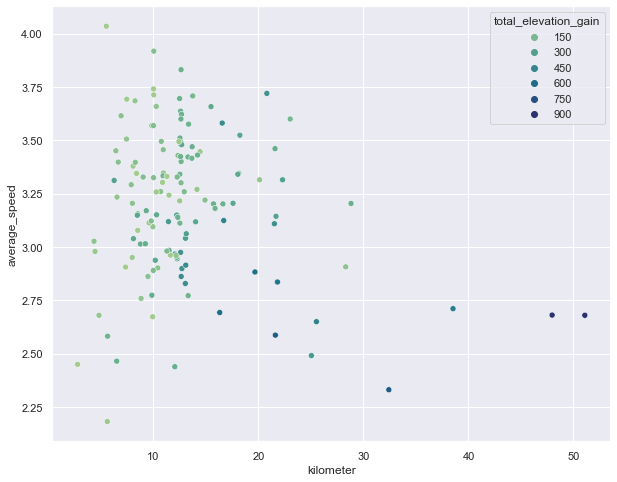

In [16]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.scatterplot(data=runs, x="kilometer", y="average_speed", hue="total_elevation_gain", palette="crest")
plt.savefig("scatterplot1.pdf")

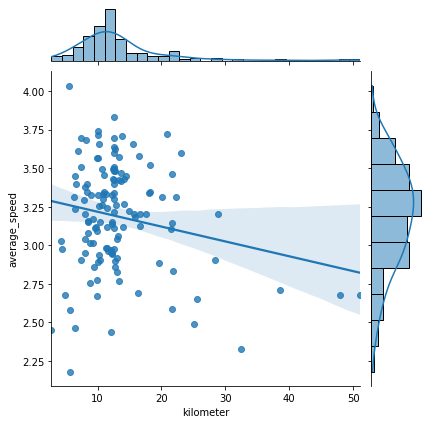

In [7]:
sns.jointplot(x = "kilometer", y = "average_speed", data=runs, kind='reg');

<AxesSubplot:xlabel='weekday', ylabel='Count'>

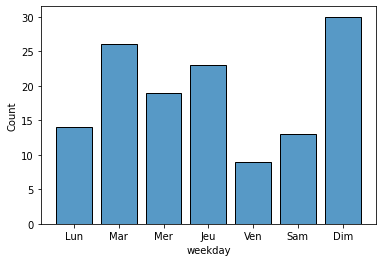

In [8]:
sns.histplot(data=runs, x="weekday", shrink=.8)


/tmp/ipykernel_84762/2541913138.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


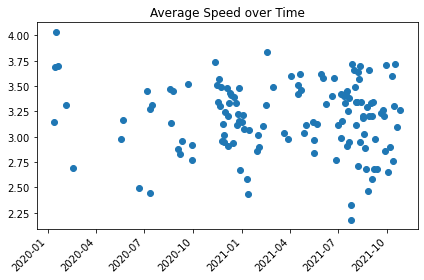

In [9]:

fig = plt.figure() #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure
x = np.asarray(runs.start_date_local)  #convert data to numpy array
y = np.asarray(runs.average_speed)
ax1.plot_date(x, y) #plot data points in scatter plot on ax1
ax1.set_title('Average Speed over Time')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()